In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv('data/shampoo_with_exog.csv')
print(df.size)
df.head()

108


,Month,Sales,Inflation
0,1-Jan,266.0,1
1,2-Jan,145.9,3
2,3-Jan,183.1,5
3,4-Jan,119.3,5
4,5-Jan,180.3,4


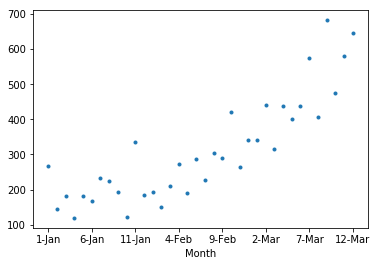

In [8]:
df.set_index('Month')['Sales'].plot(style='.')

#### Observation: 
* We're observing an upward trend with some cyclical behavior
* There are 108 sales data points

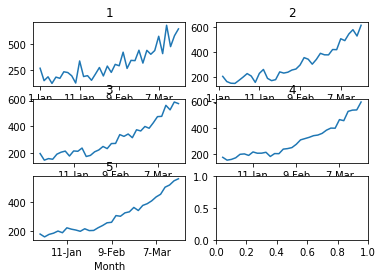

In [41]:
# smooth the line by calculating moving average
mv=range(1, 6)
num_columns=2
fig, ax=plt.subplots(-(-len(mv)//num_columns), num_columns)
for i, each_avg in enumerate(mv): 
    current_ax=df.set_index('Month')['Sales'].rolling(window=each_avg).mean().plot(ax=ax[int(i/num_columns)][i%num_columns]).set_title(each_avg)

Use a **Baseline Naive Model** - assumes previous value is related to current value

In [46]:
df_base=pd.concat([df.set_index('Month')['Sales'], df.set_index('Month')['Sales'].shift(1)], axis=1)
df_base.columns=['Actual', 'Forecast']
df_base.dropna(inplace=True)
df_base.head()

,Actual,Forecast
Month,,
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3
6-Jan,168.5,180.3


Use MSE from **sklearn**

In [50]:
from sklearn.metrics import mean_squared_error
import numpy as np
df_error=mean_squared_error(df_base['Actual'], df_base['Forecast'])
df_error

11715.388285714285

Use **ARIMA** - AutoRegressive Integrated Moving Average
* **AR** : Autoregression - A model that uses the dependent relationship between an observation and some number of lagged observations. 
* **I** : Integrated - The use of differencing of raw observations in order to make the time series stationary. 
* **MA** : Moving Average - A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. 

ARIMA(p, d, q) where
* p=lag order, 
* d=degree of differencing, and 
* q=moving average window